# Feature Enginerring

### Load Clean Dataset for Feature Engineering


In [2]:
import pandas as pd

# Start fresh from clean data
df = pd.read_csv("../Data/breast_cancer_cleaned.csv")
df_fe = df.copy()  # feature-engineered version

# Sanity check
print("Data loaded. Shape:", df_fe.shape)
display(df_fe.head())

Data loaded. Shape: (286, 10)


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


###  Feature Engineering: Convert Age Ranges to Midpoints


In [4]:
# Helper function to convert range string to midpoint
def range_midpoint(rng):
    try:
        parts = rng.split('-')
        return (int(parts[0]) + int(parts[1])) / 2
    except:
        return None

# Apply to 'age'
df_fe['age_mid'] = df_fe['age'].apply(range_midpoint)

# Sanity check
print("Converted age range to midpoint:")
print(df_fe[['age', 'age_mid']].head())

Converted age range to midpoint:
     age  age_mid
0  40-49     44.5
1  50-59     54.5
2  50-59     54.5
3  40-49     44.5
4  40-49     44.5


###  Convert Tumor Size Ranges to Midpoints


In [6]:
# Convert tumor-size to numeric midpoint
df_fe['tumor_size_mid'] = df_fe['tumor-size'].apply(range_midpoint)

# Sanity check
print("Converted tumor-size range to midpoint:")
print(df_fe[['tumor-size', 'tumor_size_mid']].head())

Converted tumor-size range to midpoint:
  tumor-size  tumor_size_mid
0      15-19            17.0
1      15-19            17.0
2      35-39            37.0
3      35-39            37.0
4      30-34            32.0


### Convert Involved Nodes Ranges to Midpoints


In [8]:
# Convert inv-nodes to numeric midpoint
df_fe['inv_nodes_mid'] = df_fe['inv-nodes'].apply(range_midpoint)

# Sanity check
print("Converted inv-nodes range to midpoint:")
print(df_fe[['inv-nodes', 'inv_nodes_mid']].head())


Converted inv-nodes range to midpoint:
  inv-nodes  inv_nodes_mid
0       0-2            1.0
1       0-2            1.0
2       0-2            1.0
3       0-2            1.0
4       3-5            4.0


###  One-Hot Encode Menopause


In [9]:
# One-hot encode menopause and add to df_fe
menopause_dummies = pd.get_dummies(df_fe['menopause'], prefix='menopause')
df_fe = pd.concat([df_fe, menopause_dummies], axis=1)

# Sanity check
print("One-hot encoded menopause columns:")
print(menopause_dummies.head())

One-hot encoded menopause columns:
   menopause_ge40  menopause_lt40  menopause_premeno
0           False           False               True
1            True           False              False
2            True           False              False
3           False           False               True
4           False           False               True


##### Quick note: if we want the columns to be int (0/1 instead of True/False), we can cast them later with .astype(int), sometimes helps with model compatibility.



### One-Hot Encode Node-Caps


In [10]:
# One-hot encode node-caps
node_caps_dummies = pd.get_dummies(df_fe['node-caps'], prefix='node_caps')
df_fe = pd.concat([df_fe, node_caps_dummies], axis=1)

print("One-hot encoded node-caps columns:")
print(node_caps_dummies.head())

One-hot encoded node-caps columns:
   node_caps_no  node_caps_yes
0         False           True
1          True          False
2          True          False
3         False           True
4         False           True


### One-Hot Encode Irradiation Status

In [11]:
# One-hot encode irradiat
irradiat_dummies = pd.get_dummies(df_fe['irradiat'], prefix='irradiat')
df_fe = pd.concat([df_fe, irradiat_dummies], axis=1)

print("One-hot encoded irradiat columns:")
print(irradiat_dummies.head())

One-hot encoded irradiat columns:
   irradiat_no  irradiat_yes
0         True         False
1         True         False
2         True         False
3        False          True
4         True         False


### One-Hot Encode Breast Side

In [12]:
# One-hot encode breast side
breast_dummies = pd.get_dummies(df_fe['breast'], prefix='breast')
df_fe = pd.concat([df_fe, breast_dummies], axis=1)

print("One-hot encoded breast columns:")
print(breast_dummies.head())

One-hot encoded breast columns:
   breast_left  breast_right
0        False          True
1        False          True
2         True         False
3        False          True
4         True         False


### One-Hot Encode Breast Quadrant


In [13]:
# One-hot encode breast quadrant
quad_dummies = pd.get_dummies(df_fe['breast-quad'], prefix='quad')
df_fe = pd.concat([df_fe, quad_dummies], axis=1)

print("One-hot encoded breast-quad columns:")
print(quad_dummies.head())

One-hot encoded breast-quad columns:
   quad_central  quad_left_low  quad_left_up  quad_right_low  quad_right_up
0         False          False          True           False          False
1          True          False         False           False          False
2         False           True         False           False          False
3         False           True         False           False          False
4         False          False         False           False           True


### Finalized Feature-Engineered Dataset 

We have completed feature engineering on the clean breast cancer dataset. The transformed dataset includes:

- Numeric midpoints for: `age`, `tumor-size`, and `inv-nodes`
- One-hot encoded categorical features: `menopause`, `node-caps`, `irradiat`, `breast`, `breast-quad`
- `deg-malig` is kept as-is (already numeric)
- Original `Class` column is preserved for potential analysis or comparison
- The data is now ready for clustering

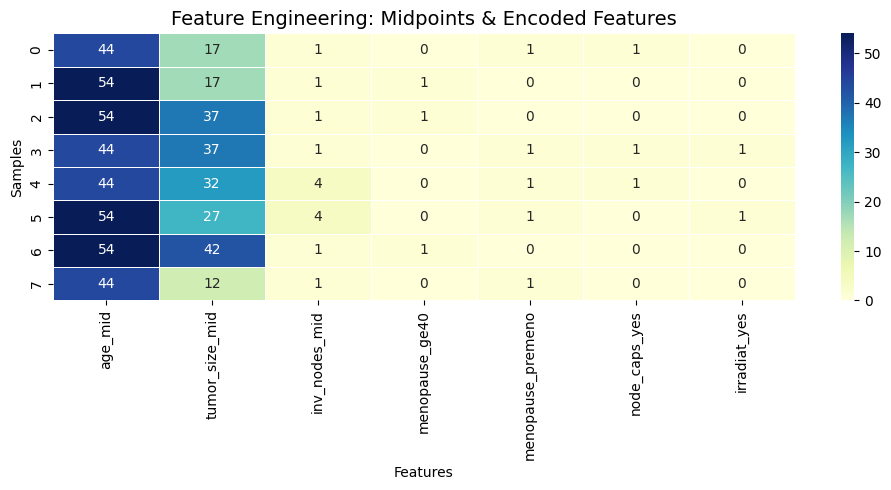

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load feature-engineered dataset
df = pd.read_csv("../Data/breast_cancer_feature_engineered.csv")

# Select numeric-engineered features only for the heatmap
heatmap_cols = [
    'age_mid', 'tumor_size_mid', 'inv_nodes_mid',
    'menopause_ge40', 'menopause_premeno',
    'node_caps_yes', 'irradiat_yes'
]

# Optional: Convert booleans to int for heatmap coloring
df_heat = df[heatmap_cols].head(8).astype(int)

# Create the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df_heat, annot=True, cmap='YlGnBu', fmt='d', linewidths=0.5)
plt.title("Feature Engineering: Midpoints & Encoded Features", fontsize=14)
plt.xlabel("Features")
plt.ylabel("Samples")
plt.tight_layout()
plt.show()


In [14]:
# Save the feature-engineered dataset (with Class still intact)
df_fe.to_csv("../Data/breast_cancer_feature_engineered.csv", index=False)
print("Feature-engineered dataset saved as 'breast_cancer_feature_engineered.csv'")

Feature-engineered dataset saved as 'breast_cancer_feature_engineered.csv'
